In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from folium.plugins import HeatMap
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df= pd.read_csv("C:/Users/akrit/Downloads/hotel_bookings 2.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.describe()
# df.info()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# df.isnull().sum()
# df.shape[0]
# df.shape
null_values=pd.DataFrame({'null values':df.isnull().sum(),'percentage of null values':(df.isnull().sum())/(df.shape[0])*100})
null_values

,null values,percentage of null values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [12]:
df.fillna(0,inplace=True)

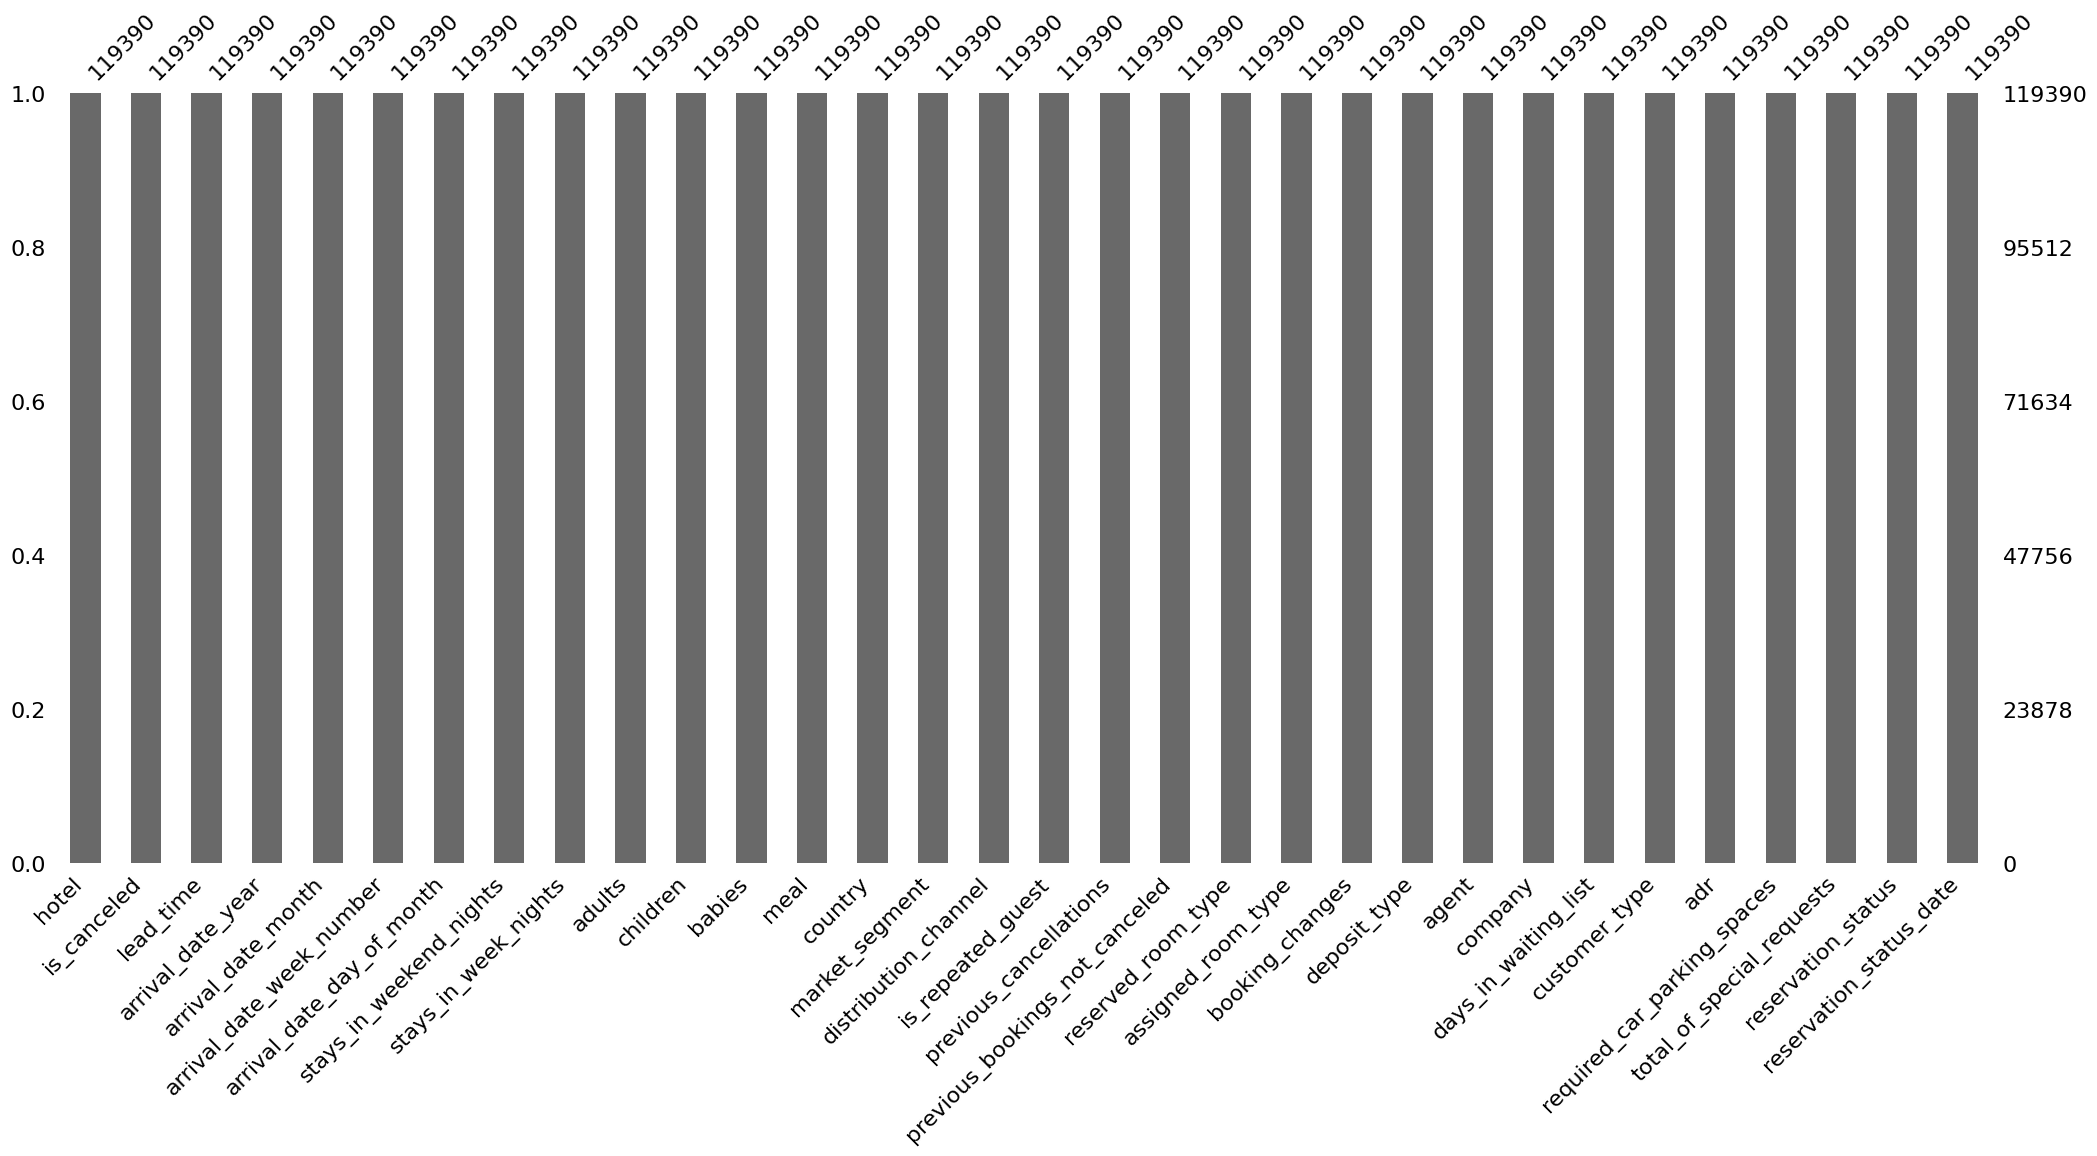

In [7]:
msno.bar(df)
plt.show()

In [17]:
f= (df["children"]==0)&(df['adults']==0)&(df['babies']==0)
f
df=df[~f]

In [4]:
country_wise_guests=df[df['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_guests.columns=['country','no of guests ']
country_wise_guests

,country,no of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [10]:

# m=folium.Map()
fig=px.choropleth(country_wise_guests,locations=country_wise_guests['country'],
                  color=country_wise_guests['no of guests '],hover_name=country_wise_guests['country'])

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={'r':70,'l':70,'t':70,'b':70}, title_text = 'number of customers from around the world')

fig.show()


In [11]:
cost=df[df['is_canceled']==0]
cost

fig=px.box(cost,x='reserved_room_type',y='adr',color='hotel',labels={'reserved_room_type':'room-type','adr':'cost'})
fig.show()
# fig=px.box(cost,x='meal',y='adr',color='hotel')
# fig.show()

In [12]:
resort_data=df[(df["hotel"]=="Resort Hotel")&(df["is_canceled"]==0)]
resort_data
city_data=df[(df["hotel"]=="City Hotel")&(df["is_canceled"]==0)]
city_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,3/7/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,5/7/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,5/7/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,5/7/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,5/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [13]:
resort_hotel=resort_data.groupby(["arrival_date_month"])["adr"].mean().reset_index()
resort_hotel
city_hotel=city_data.groupby(["arrival_date_month"])["adr"].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [14]:
finale_cost=resort_hotel.merge(city_hotel,on='arrival_date_month')
finale_cost.columns=['month','price of resort','price of city']

finale_cost

,month,price of resort,price of city
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [15]:
import sort_dataframeby_monthorweek as sd

In [16]:
finale_prise=sd.Sort_Dataframeby_Month(finale_cost,'month')
finale_prise

,month,price of resort,price of city
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [17]:
fig=px.line(finale_prise,x='month',y=['price of resort','price of city'],title='room prices per month',template='plotly_dark')
fig.show()

In [18]:
city_guest=city_data['arrival_date_month'].value_counts().reset_index()
city_guest
resort_guest=resort_data['arrival_date_month'].value_counts().reset_index()
resort_guest

,arrival_date_month,count
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [19]:
finale_guest=resort_guest.merge(city_guest,on='arrival_date_month')
finale_guest

fin_guest=sd.Sort_Dataframeby_Month(finale_guest,'arrival_date_month')
fin_guest.columns=['month','no. of guest in resort','no of guest in city']
fin_guest

,month,no. of guest in resort,no of guest in city
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [20]:
fig=px.line(fin_guest,x='month',y=['no. of guest in resort','no of guest in city'],title='number of guest per month')
fig.show()

In [21]:
filter=df['is_canceled']==0
data=df[filter]
data




,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [22]:


data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,1/7/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,1/7/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2/7/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2/7/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,3/7/2015,2


In [23]:
stay =data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,:3]
stay=stay.rename(columns={'is_canceled':'no. of stays'})
stay


,total_nights,hotel,no. of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


In [24]:
fig=px.bar(stay,x='total_nights',y='no. of stays',color='hotel',template='plotly_dark')
fig.show()

In [25]:
df=pd.read_csv("C:/Users/akrit/Downloads/hotel_bookings 2.csv")
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [26]:
files=df
files


cat_cols = [col for col in files.columns if files[col].dtype == 'O']
cat_cols


['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [27]:

cat=df[cat_cols]
cat_df = df[cat_cols]
cat_df.head()



,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,1/7/2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,1/7/2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2/7/2015
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2/7/2015
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,3/7/2015


In [28]:
for col in cat_df.columns:
    print(f'{col}:\n {cat_df[col].unique()}\n')

hotel:
 ['Resort Hotel' 'City Hotel']

arrival_date_month:
 ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal:
 ['BB' 'FB' 'HB' 'SC' 'Undefined']

country:
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA

In [29]:
cat_df['reservation_status_date'].str.split('/')

cat_df['day']=cat_df['reservation_status_date'].str.split('/').str[0]
cat_df['month']=cat_df['reservation_status_date'].str.split('/').str[1]
cat_df['year']=cat_df['reservation_status_date'].str.split('/').str[2]


cat_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,day,month,year
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,1/7/2015,1,7,2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,1/7/2015,1,7,2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2/7/2015,2,7,2015
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2/7/2015,2,7,2015
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,3/7/2015,3,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,6/9/2017,6,9,2017
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,7/9/2017,7,9,2017
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,7/9/2017,7,9,2017
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,7/9/2017,7,9,2017


In [30]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({'2015': 0, '2014': 1, '2016': 2, '2017': 3}).fillna(-1) 

In [31]:
cat_df.fillna(0,inplace=True)
cat_df
#string values

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,day,month,year
0,0,July,0,PRT,0,0,0.0,C,0,0,Check-Out,1/7/2015,1,7,0
1,0,July,0,PRT,0,0,0.0,C,0,0,Check-Out,1/7/2015,1,7,0
2,0,July,0,GBR,0,0,1.0,C,0,0,Check-Out,2/7/2015,2,7,0
3,0,July,0,GBR,1,1,1.0,A,0,0,Check-Out,2/7/2015,2,7,0
4,0,July,0,GBR,2,2,1.0,A,0,0,Check-Out,3/7/2015,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,August,0,BEL,3,2,1.0,A,0,0,Check-Out,6/9/2017,6,9,3
119386,1,August,0,FRA,2,2,3.0,E,0,0,Check-Out,7/9/2017,7,9,3
119387,1,August,0,DEU,2,2,2.0,D,0,0,Check-Out,7/9/2017,7,9,3
119388,1,August,0,GBR,2,2,1.0,A,0,0,Check-Out,7/9/2017,7,9,3


In [32]:
num_df=files.drop(columns=cat,axis=1)
num_df.fillna(0,inplace=True)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df
#numerical values

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,0,104.40,0,0


In [33]:
# num_df.describe()


nu=pd.DataFrame({"mean":num_df.mean(),"median":num_df.median(),"mode":num_df.mode().values.flatten()})
nu


,mean,median,mode
lead_time,104.011416,69.000,0.0
arrival_date_year,2016.156554,2016.000,2016.0
arrival_date_week_number,27.165173,28.000,33.0
arrival_date_day_of_month,15.798241,16.000,17.0
stays_in_weekend_nights,0.927599,1.000,0.0
stays_in_week_nights,2.500302,2.000,2.0
adults,1.856403,2.000,2.0
children,0.103886,0.000,0.0
babies,0.007949,0.000,0.0
is_repeated_guest,0.031912,0.000,0.0


In [34]:
num_df.var()

lead_time                         11419.721511
arrival_date_year                     0.500522
arrival_date_week_number            185.099790
arrival_date_day_of_month            77.102966
stays_in_weekend_nights               0.997229
stays_in_week_nights                  3.641554
adults                                0.335543
children                              0.158846
babies                                0.009494
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
booking_changes                       0.425503
agent                             11479.398119
company                            2909.942594
days_in_waiting_list                309.574203
adr                                2553.866100
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
dtype: float64

In [35]:
num_df['lead_time']= np.log(num_df['lead_time']+1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [36]:
num_df.var()

lead_time                           2.591420
arrival_date_year                   0.500522
arrival_date_week_number            0.441039
arrival_date_day_of_month           0.506267
stays_in_weekend_nights             0.997229
stays_in_week_nights                3.641554
adults                              0.335543
children                            0.158846
babies                              0.009494
is_repeated_guest                   0.030894
previous_cancellations              0.712904
previous_bookings_not_canceled      2.242317
booking_changes                     0.425503
agent                               3.536189
company                             1.350926
days_in_waiting_list              309.574203
adr                                 0.540353
required_car_parking_spaces         0.060168
total_of_special_requests           0.628529
dtype: float64

In [37]:
new=num_df.join(cat_df,lsuffix="_left",rsuffix="_right",how="left")
new.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel', 'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date', 'day',
       'month', 'year'],
      dtype='object')

In [38]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list','reservation_status_date','arrival_date_month']



# new.drop(useless_col,axis=1,inplace=True )
new.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel', 'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date', 'day',
       'month', 'year'],
      dtype='object')

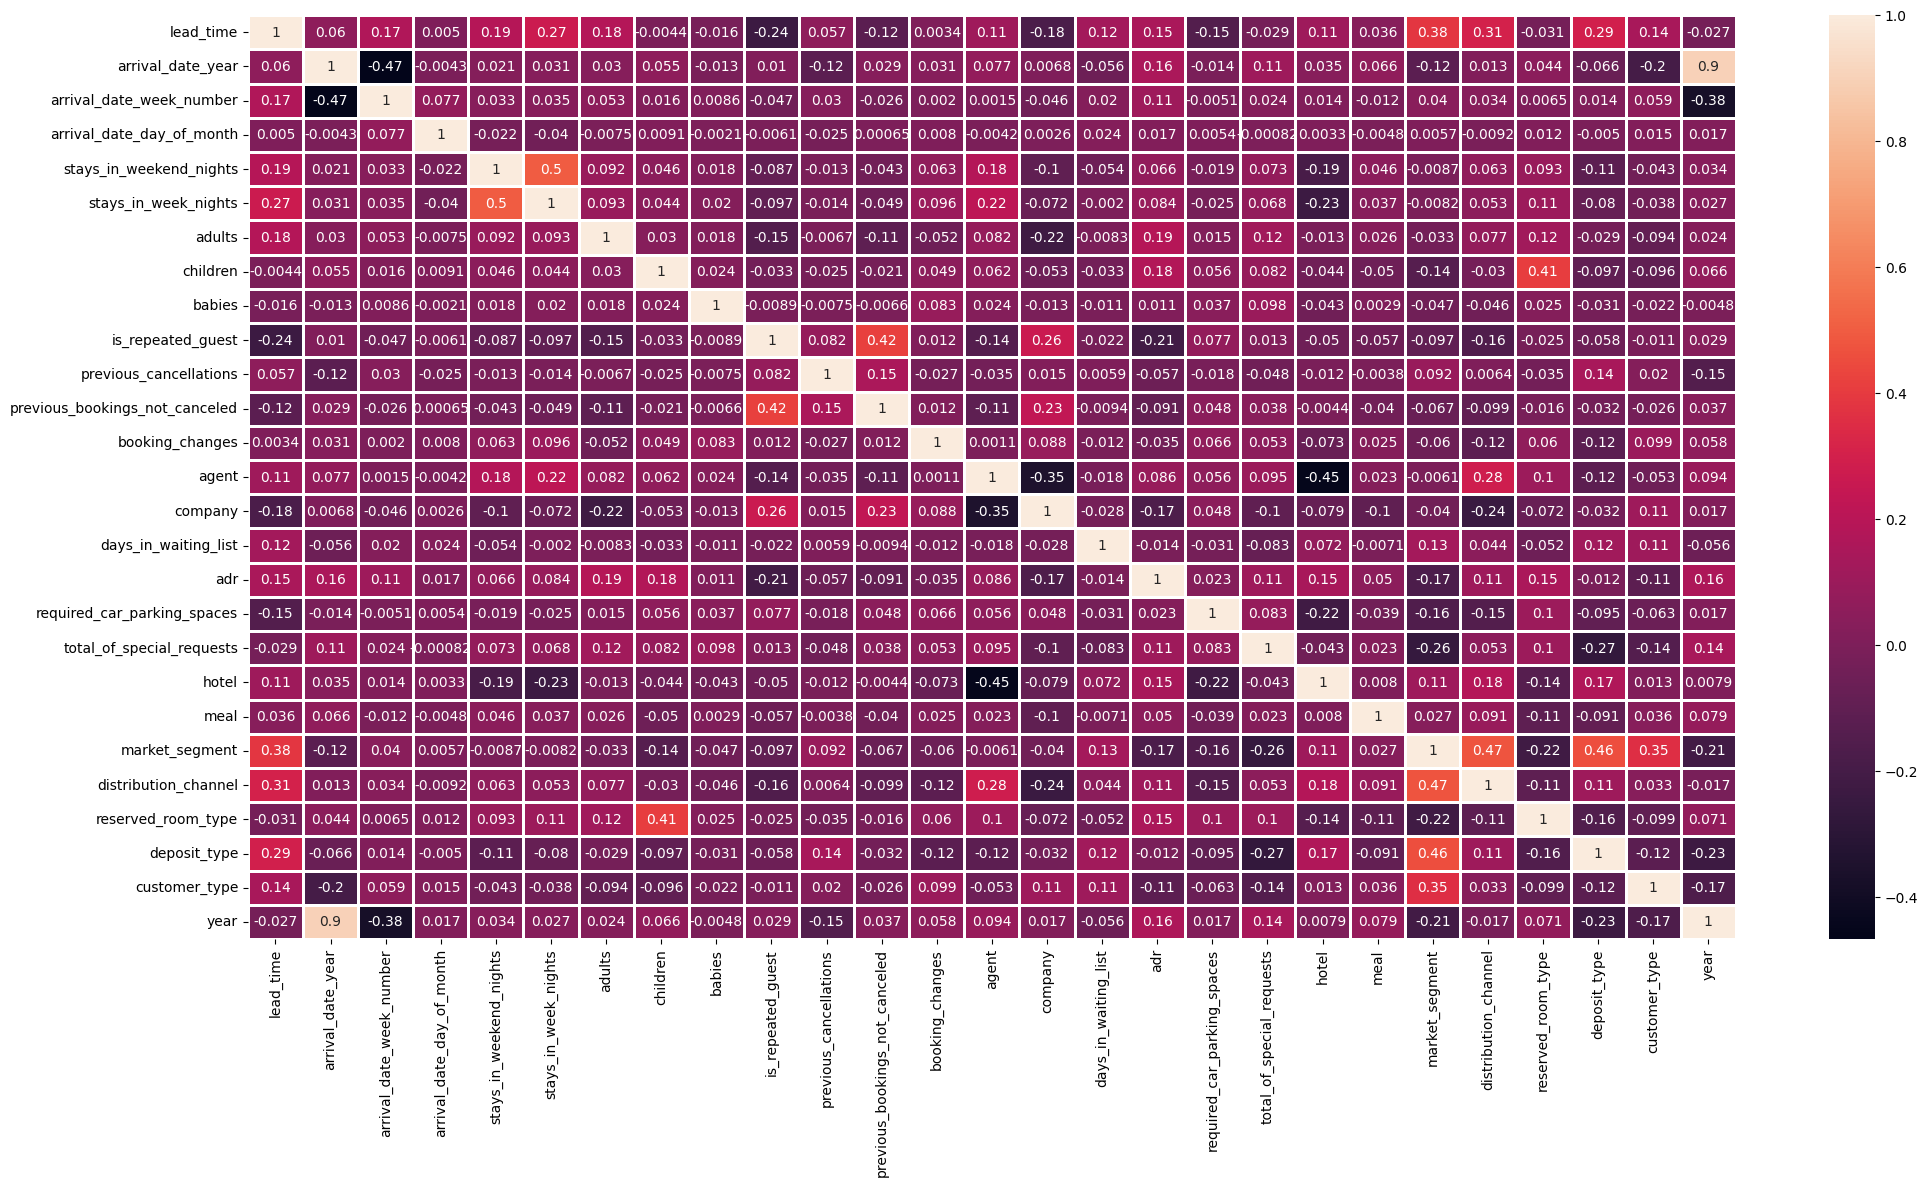

In [39]:
numeric_df = new.select_dtypes(include=['number'])


corr = numeric_df.corr()


plt.figure(figsize=(24, 12))
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()